# 地図データと標高差分析ノートブック

このノートブックでは、ユーザーが入力した2つの住所に基づいて、それぞれの標高情報を取得し、その標高差を計算します。

## 1. 住所の入力

In [1]:
address1 = input('最初の住所を入力してください: ')
address2 = input('2番目の住所を入力してください: ')

最初の住所を入力してください:  川崎市宮前区平４−５
2番目の住所を入力してください:  川崎市多摩区登戸新町２１１


## 2. Yahoo!ジオコーディングAPIを使用して緯度経度を取得

In [10]:
import requests
from IPython.display import display, HTML

# アプリケーションIDの設定
appid = 'your yahoo japan appid'

# 2つの住所のジオコーディング
def get_coordinates(address):
    url = f"https://map.yahooapis.jp/geocode/V1/geoCoder?appid={appid}&query={address}&output=json&sort=address2"
    response = requests.get(url)
    data = response.json()
    
    if 'Feature' in data:
        coordinates = data['Feature'][0]['Geometry']['Coordinates']
        return coordinates.split(',')
    else:
        print(f"エラーまたは住所が見つかりません: {data}")
        return [None, None]

def display_map(latitude, longitude):
    """指定した緯度経度にマーカーを表示する地図を埋め込む関数"""
    html_template = f"""
    <iframe src="https://www.openstreetmap.org/export/embed.html?bbox={longitude-0.005}%2C{latitude-0.005}%2C{longitude+0.005}%2C{latitude+0.005}&amp;layer=mapnik&amp;marker={latitude}%2C{longitude}" style="border: none;" width="600" height="450"></iframe>
    """
    display(HTML(html_template))

# 住所を入力
address1 = input('最初の住所を入力してください: ')
address2 = input('2番目の住所を入力してください: ')

# 緯度経度の取得
coordinates1 = get_coordinates(address1)
coordinates2 = get_coordinates(address2)

# 地図の表示
if coordinates1[0] is not None and coordinates2[0] is not None:
    latitude1, longitude1 = map(float, coordinates1)
    latitude2, longitude2 = map(float, coordinates2)
    
    print(f"最初の住所の緯度経度: {coordinates1}")
    display_map(latitude1, longitude1)
    
    print(f"2番目の住所の緯度経度: {coordinates2}")
    display_map(latitude2, longitude2)
else:
    print("位置情報を取得できませんでした。")


最初の住所を入力してください:  川崎市多摩区登戸新町１
2番目の住所を入力してください:  川崎市宮前区初山１−２３


最初の住所の緯度経度: ['139.56546191', '35.62636788']


2番目の住所の緯度経度: ['139.56161452', '35.59681442']


## 3. Yahoo!標高APIを使用して標高情報を取得

In [11]:

# 2つの住所の標高情報の取得
def get_altitude(coordinates):
    coord_string = ','.join(coordinates)
    url = f"https://map.yahooapis.jp/alt/V1/getAltitude?appid={appid}&coordinates={coord_string}&output=json"
    response = requests.get(url)
    data = response.json()
    
    if 'Feature' in data:
        altitude = data['Feature'][0]['Property']['Altitude']
        return altitude
    else:
        print(f"エラーまたは標高情報が見つかりません: {data}")
        return None

altitude1 = get_altitude(coordinates1)
altitude2 = get_altitude(coordinates2)

if altitude1 is not None and altitude2 is not None:
    print(f"最初の住所の標高: {altitude1}メートル")
    print(f"2番目の住所の標高: {altitude2}メートル")
else:
    print("標高情報を取得できませんでした。")
        

最初の住所の標高: 20.1メートル
2番目の住所の標高: 40.5メートル


## 4. 標高差の計算と視覚化

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

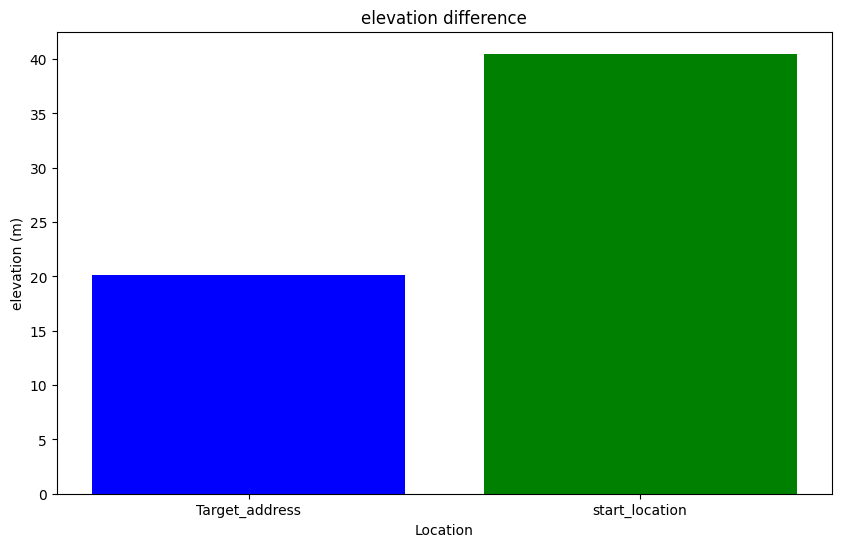

elevation_difference: 20.4m


In [12]:
import matplotlib.pyplot as plt
import matplotlib

# 日本語フォントの指定 (例: 'IPAexGothic')
matplotlib.rcParams['font.family'] = 'IPAexGothic'

# 標高差の計算
if altitude1 is not None and altitude2 is not None:
    elevation_difference = abs(altitude1 - altitude2)

    # 標高差の視覚化
    locations = ['Target_address', 'start_location']
    altitudes = [altitude1, altitude2]

    plt.figure(figsize=(10, 6))
    plt.bar(locations, altitudes, color=['blue', 'green'])
    plt.xlabel('Location')
    plt.ylabel('elevation (m)')
    plt.title('elevation difference')
    plt.show()

    print(f"elevation_difference: {elevation_difference}m")
else:
    print("標高差を計算できません。")

        